## Question 1

Apply PCA on Iris data set and reduce its dimensionality .

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [284]:
data = pd.read_csv("C:/Users/hp/Downloads/ML_LAB/ML_Lab-7/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [286]:
data = data.drop("Id", axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [288]:
x = data.drop("Species", axis=1)  
y = data["Species"]  
print(x.shape, y.shape)

(150, 4) (150,)


In [290]:
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [292]:
X_pca_data = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
X_pca_data.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


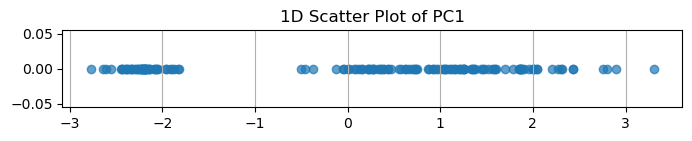

In [294]:
plt.figure(figsize=(8, 1))
plt.scatter(X_pca_data["PC1"], [0]*len(X_pca_data), alpha=0.7)
plt.title("1D Scatter Plot of PC1")
plt.grid(True, axis='x')
plt.show()

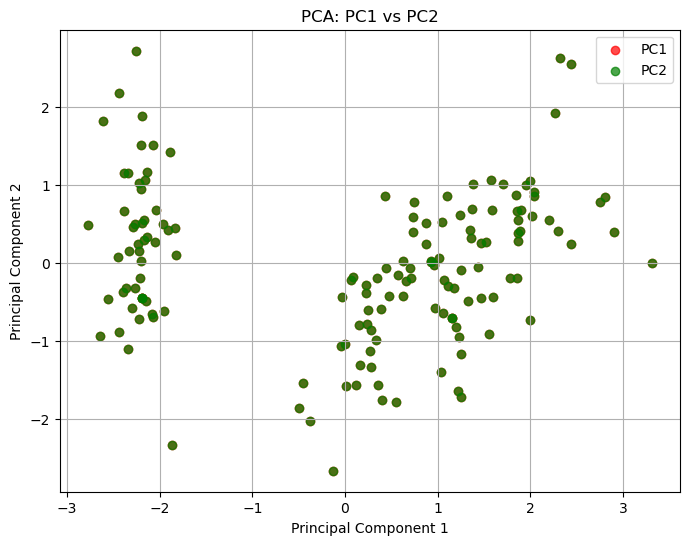

In [296]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca_data["PC1"], X_pca_data["PC2"], alpha=0.7, color='red', label='PC1')
plt.scatter(X_pca_data["PC1"], X_pca_data["PC2"], alpha=0.7, color='green', label='PC2')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: PC1 vs PC2")
plt.grid(True)
plt.legend()
plt.show()

In [300]:
category_counts = data["Species"].value_counts()
print(category_counts)

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [304]:
y = y.map({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica' : 3})
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Species, dtype: int64

In [308]:
category_counts = y.value_counts()
print(category_counts)

Species
1    50
2    50
3    50
Name: count, dtype: int64


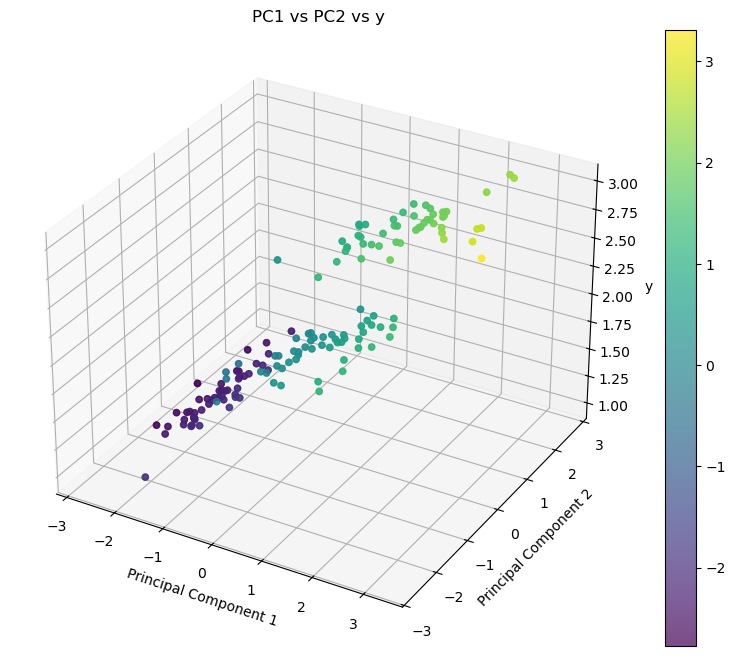

In [324]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_pca_data contains PC1, PC2, and PC3, and y contains labels or values for coloring
fig = plt.figure(figsize=(10, 8))

# Create 3D axis
ax = fig.add_subplot(111, projection='3d')

# Color the points based on PC1
ax.scatter(X_pca_data['PC1'], X_pca_data['PC2'], y, c=X_pca_data['PC1'], cmap='viridis', alpha=0.7)

# Label the axes
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("y")

# Title for the plot
ax.set_title("PC1 vs PC2 vs y")

# Show the color bar to indicate the scale
plt.colorbar(ax.scatter(X_pca_data['PC1'], X_pca_data['PC2'], y, c=X_pca_data['PC1'], cmap='viridis', alpha=0.7))

# Show the plot
plt.show()




## Question 2

Compress the given image using PCA without reducing its special
dimension.

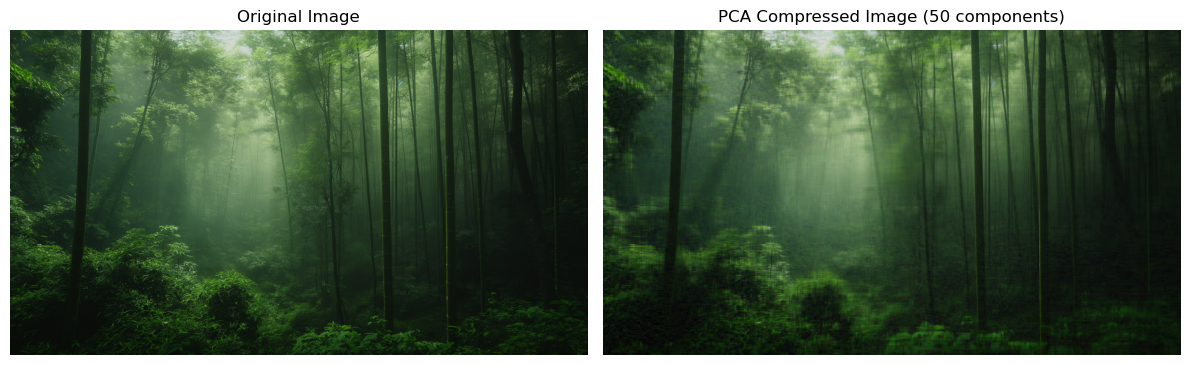

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
img = Image.open("C:/Users/hp/OneDrive/Pictures/Saved Pictures/forest-3840x2160-4k-5k-wallpaper-8k-trees-green-bamboo-6524.jpg")
img_array = np.array(img)
def compress_image_pca(img_array, n_components=50):
    compressed_channels = []
    for i in range(3): 
        channel = img_array[:, :, i]
        pca = PCA(n_components=n_components)
        transformed = pca.fit_transform(channel)
        restored = pca.inverse_transform(transformed)
        restored = np.clip(restored, 0, 255).astype(np.uint8)
        compressed_channels.append(restored)
    compressed_img = np.stack(compressed_channels, axis=2)
    return compressed_img
compressed_img_array = compress_image_pca(img_array, n_components=50)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(compressed_img_array)
plt.title("PCA Compressed Image (50 components)")
plt.axis("off")
plt.tight_layout()
plt.show()


## Question 3

For the given wine quality data, use SVM to classify wine types. Provide
confusion matrix for prediction accuracy. Plot a graph which shows
decision boundary that separates the classes.

In [217]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
data = pd.read_csv("C:/Users/hp/Downloads/ML_LAB/ML_Lab-7/winequality.csv")
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,7.0,0.27,0.36,20.7,0.045,45,170.0,1.0010,3.00,0.45,8.8
1,white,6.3,0.30,0.34,1.6,0.049,14,132.0,0.9940,3.30,0.49,9.5
2,white,8.1,0.28,0.40,6.9,0.050,30,97.0,0.9951,3.26,0.44,10.1
3,white,7.2,0.23,0.32,8.5,0.058,47,186.0,0.9956,3.19,0.40,9.9
4,white,7.2,0.23,0.32,8.5,0.058,47,186.0,0.9956,3.19,0.40,9.9


In [221]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
dtype: int64

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   object 
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   object 
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
dtypes: float64(9), object(3)
memory usage: 609.2+ KB


In [225]:
data = data.fillna(0)
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [227]:
x = data.drop("type", axis=1)  
y = data["type"]  
print(x.shape, y.shape)

(6497, 11) (6497,)


In [229]:
# Remove anything that's not a number or a decimal point
x["free sulfur dioxide"] = x["free sulfur dioxide"].replace(r'[^0-9.]', '', regex=True)
x["free sulfur dioxide"] = x["free sulfur dioxide"].astype(float)
x["residual sugar"] = x["residual sugar"].replace(r'[^0-9.]', '', regex=True)
x["residual sugar"] = x["residual sugar"].astype(float)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


In [231]:
y.head()

0    white
1    white
2    white
3    white
4    white
Name: type, dtype: object

In [233]:
category_counts = data["type"].value_counts()
print(category_counts)

type
white    4898
red      1599
Name: count, dtype: int64


In [235]:
y = y.map({'white': 0, 'red': 1})
y.head()

0    0
1    0
2    0
3    0
4    0
Name: type, dtype: int64

In [237]:
y = y.replace(r'[^0-9.]', '', regex=True)
y = y.astype(float)

In [239]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6497 entries, 0 to 6496
Series name: type
Non-Null Count  Dtype  
--------------  -----  
6497 non-null   float64
dtypes: float64(1)
memory usage: 50.9 KB


In [241]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)
print(x_resampled.shape, y_resampled.shape)

(9796, 11) (9796,)


In [251]:
category_counts = y_resampled.value_counts()
print(category_counts)

type
0.0    4898
1.0    4898
Name: count, dtype: int64


In [243]:
corr = x_resampled.corrwith(y_resampled)
print(corr.sort_values(ascending=False))

volatile acidity        0.676596
chlorides               0.531686
sulphates               0.518285
density                 0.488762
fixed acidity           0.484288
pH                      0.326734
alcohol                -0.067988
citric acid            -0.216099
residual sugar         -0.469712
free sulfur dioxide    -0.570254
total sulfur dioxide   -0.773567
dtype: float64


In [249]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42, stratify = y_resampled)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7836, 11) (1960, 11) (7836,) (1960,)


In [253]:
category_counts = y_train.value_counts()
print(category_counts)

type
1.0    3918
0.0    3918
Name: count, dtype: int64


In [255]:
category_counts = y_test.value_counts()
print(category_counts)

type
1.0    980
0.0    980
Name: count, dtype: int64


In [257]:
# Train SVM classifier
svm = SVC(kernel='linear')  # You can also try other kernels like 'rbf', 'poly', etc.
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [259]:
# Make predictions on test data
y_pred = svm.predict(x_test)

In [261]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[971   9]
 [ 20 960]]


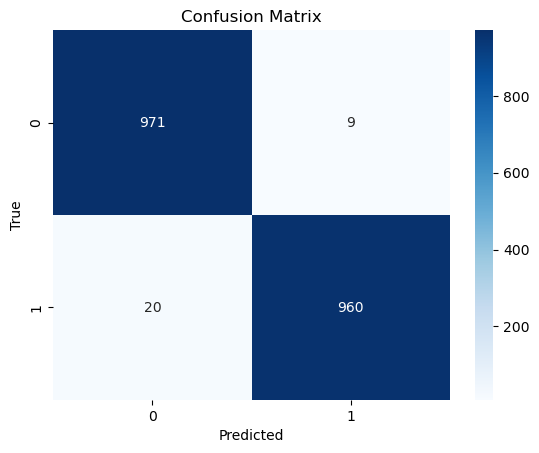

In [267]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [269]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       980
         1.0       0.99      0.98      0.99       980

    accuracy                           0.99      1960
   macro avg       0.99      0.99      0.99      1960
weighted avg       0.99      0.99      0.99      1960



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


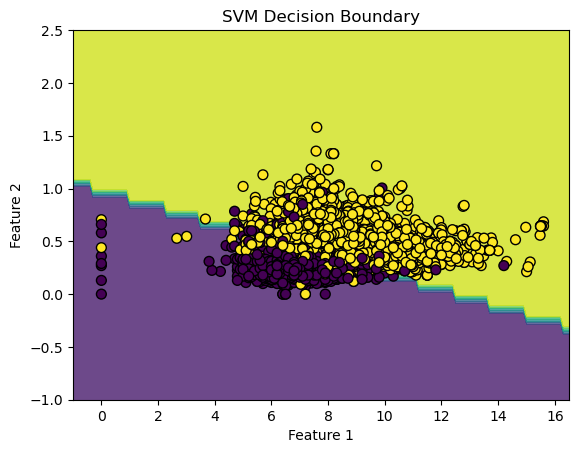

In [278]:
# Plot decision boundary (for 2 features only for simplicity)
# Selecting only the first two features for visualization
x_train_2d = x_train.iloc[:, :2]
svm_2d = SVC(kernel='linear')
svm_2d.fit(x_train_2d, y_train)

# Plotting decision boundary
x_min, x_max = X_train_2d.iloc[:, 0].min() - 1, X_train_2d.iloc[:, 0].max() + 1
y_min, y_max = X_train_2d.iloc[:, 1].min() - 1, X_train_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2d.iloc[:, 0], X_train_2d.iloc[:, 1], c=y_train, edgecolors='k', marker='o', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()